<a href="https://colab.research.google.com/github/yosaphatprs/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

#import math
from math import log10, sqrt, pow
import os
import glob

Nomor 1. Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


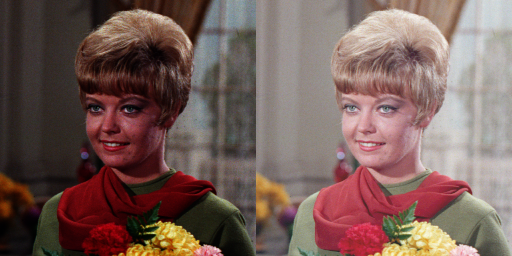

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip((255 * ((original[y,x,c]/255)**(1/gamma))), 0, 255)

#cara simple tanpa for loop
#gamma_image = cv.convertScaleAbs(original, beta=gamma)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Nomor 2. Simulasi Image Depth

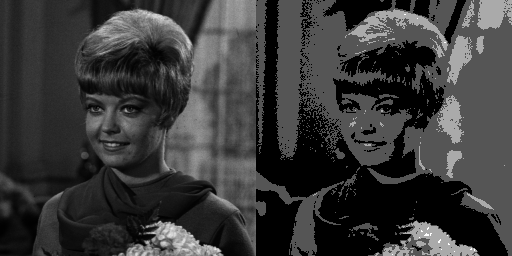

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original_gray = cv.imread('/content/drive/MyDrive/images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original_gray.shape, original_gray.dtype)

# Akses per piksel
for y in range(original_gray.shape[0]):
  for x in range(original_gray.shape[1]):
    depth_image[y, x] = np.clip(np.round(original_gray[y, x]/level)*level, 0, 255)

final_frame = cv.hconcat((original_gray, depth_image))
cv2_imshow(final_frame)

Nomor 3. Average Denoising

5 Jumlah Citra di Average 
67.71902932764368  dB


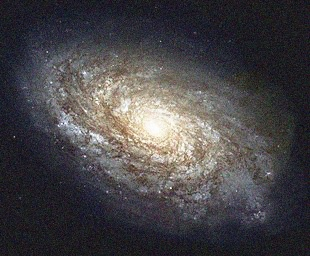

10 Jumlah Citra di Average 
67.92977543912049  dB


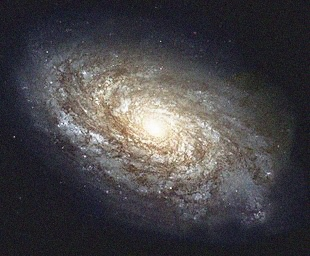

20 Jumlah Citra di Average 
68.03915048573654  dB


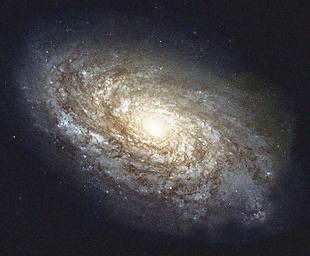

40 Jumlah Citra di Average 
68.08603931248723  dB


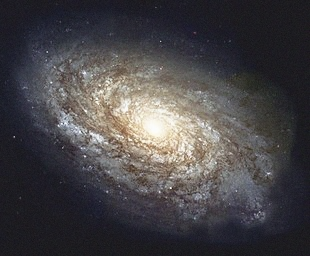

80 Jumlah Citra di Average 
68.1154867375869  dB


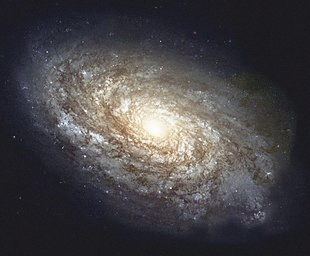

100 Jumlah Citra di Average 
68.12062342256624  dB


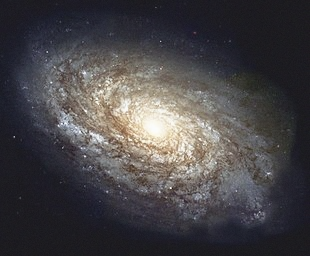

In [70]:
def psnr(original, denoised_image):
  mse = np.mean((original - denoised_image) ** 2)
  if(mse == 0): # MSE - maka tidak ada noise sama sekali, sehingga PSNR tidak memilki arti (Denoise yang sangat bagus)
      return 100
  max_pixel = 65535.0 # Karena menggunakan uint16, maka max pixelnya adalah 65535.0
  psnr = 20 * log10(max_pixel/sqrt(mse))
  return psnr

def main(jumlah_gambar):
  original_galaxy = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/galaxy.jpg')
  cv_img = []
  for img in glob.glob('/content/drive/MyDrive/PCVK_TI/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

  denoised_image = np.zeros(cv_img[0].shape)
  for i in range(jumlah_gambar):
    denoised_image = denoised_image + cv_img[i]

  denoised_image = np.uint16(denoised_image/jumlah_gambar)

  print(jumlah_gambar, 'Jumlah Citra di Average ')
  print(psnr(original_galaxy, denoised_image), ' dB')

  # final_frame = cv.hconcat((original_galaxy, denoised_image))
  cv2_imshow(denoised_image)

list_loop = [5, 10, 20, 40, 80, 100]
for i in list_loop:
  main(i)

Kesimpulan:
Banyaknya jumlah citra yang di Average (semakin banyak proses denoise), maka nilai PSNR akan semakin tinggi dan noise akan semakin berkuran. Berdasarkan output PSNR di atas dengan 5 jumlah citra denoise akan menghasilkan 67,7 dB dan 100 jumlah citra akan menghasilkan 68,12 dB. Sehingga dapat disimpulkan bahkan meskipun nilai PSNR semakin baik, namun perlu untuk dilakukan denoise yang banyak karena peningkatan yang ada tidak terlalu signifikan.

Nomor 4. Masking

NOT

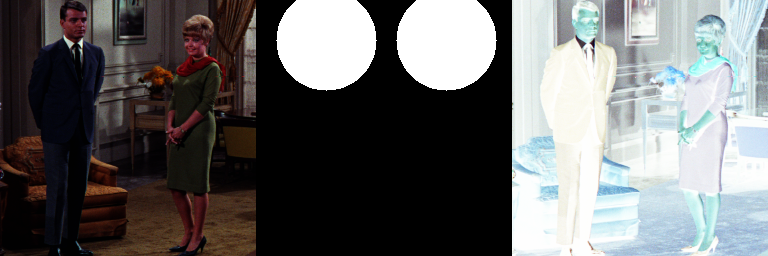

In [151]:
original_couple = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/couple.tiff')

black_image = np.zeros(original_couple.shape, original_couple.dtype)
masking = cv.circle(black_image, (70,40), 50, (255,255,255), -1);

masking2 = cv.circle(black_image, (190,40), 50, (255,255,255), -1);

result = ~original_couple

final_frame = cv.hconcat((original_couple, masking, result))
cv2_imshow(final_frame)

OR

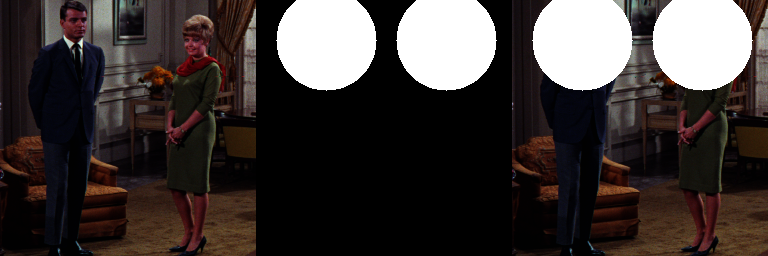

In [125]:
original_couple = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/couple.tiff')

black_image = np.zeros(original_couple.shape, original_couple.dtype)
masking = cv.circle(black_image, (70,40), 50, (255,255,255), -1);

masking2 = cv.circle(black_image, (190,40), 50, (255,255,255), -1);

result = original_couple | masking | masking2

final_frame = cv.hconcat((original_couple, masking, result))
cv2_imshow(final_frame)

AND

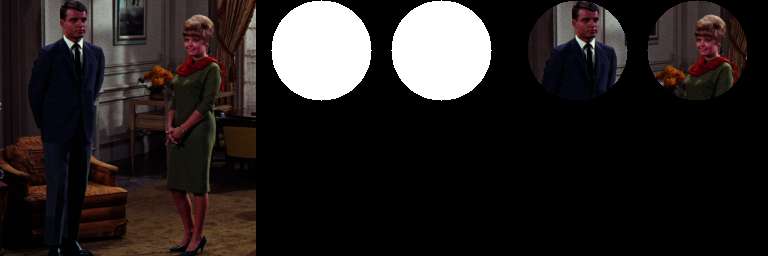

In [143]:
original_couple = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/couple.tiff')

black_image = np.zeros(original_couple.shape, original_couple.dtype)
masking = cv.circle(black_image, (65,50), 50, (255,255,255), -1);

masking2 = cv.circle(black_image, (185,50), 50, (255,255,255), -1);

result = original_couple & masking & masking2

final_frame = cv.hconcat((original_couple, masking, result))
cv2_imshow(final_frame)

NAND

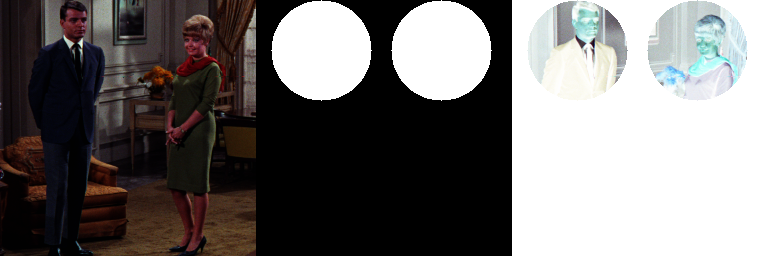

In [152]:
original_couple = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/couple.tiff')

black_image = np.zeros(original_couple.shape, original_couple.dtype)
masking = cv.circle(black_image, (65,50), 50, (255,255,255), -1);

masking2 = cv.circle(black_image, (185,50), 50, (255,255,255), -1);

result = cv.bitwise_not(original_couple & masking & masking2)

final_frame = cv.hconcat((original_couple, masking, result))
cv2_imshow(final_frame)

XOR

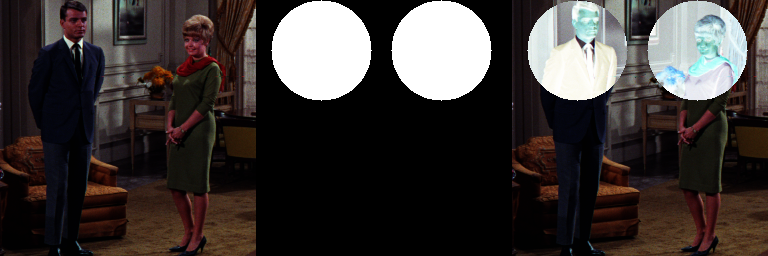

In [149]:
original_couple = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/couple.tiff')

black_image = np.zeros(original_couple.shape, original_couple.dtype)
masking = cv.circle(black_image, (65,50), 50, (255,255,255), -1);

masking2 = cv.circle(black_image, (185,50), 50, (255,255,255), -1);

result = cv.bitwise_xor(original_couple, masking2)

final_frame = cv.hconcat((original_couple, masking2, result))
cv2_imshow(final_frame)

Hasil Analisa:
- NOT: NOT akan menghasilkan citra negatif karena fungsi NOT akan membalik nilai piksel.
- OR: OR akan menghasilkan citra yang menggabungkan citra asli dan masking
- AND: AND akan menghasilkan citra asli yang dipotong oleh masking
- NAND: NAND akan menghasilkan citra AND yang di inverse (dibalik) nilai pikselnya
- XOR: XOR akan menghasilkan citra negatif dari irisan masking citra asli dan citra masking